In [9]:
import sys
sys.path.append("../TI_modules/")
import TI_greensfn
import multiprocessing as mp

%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
TIG0=TI_greensfn.init_material(npix=40)

<IPython.core.display.Javascript object>


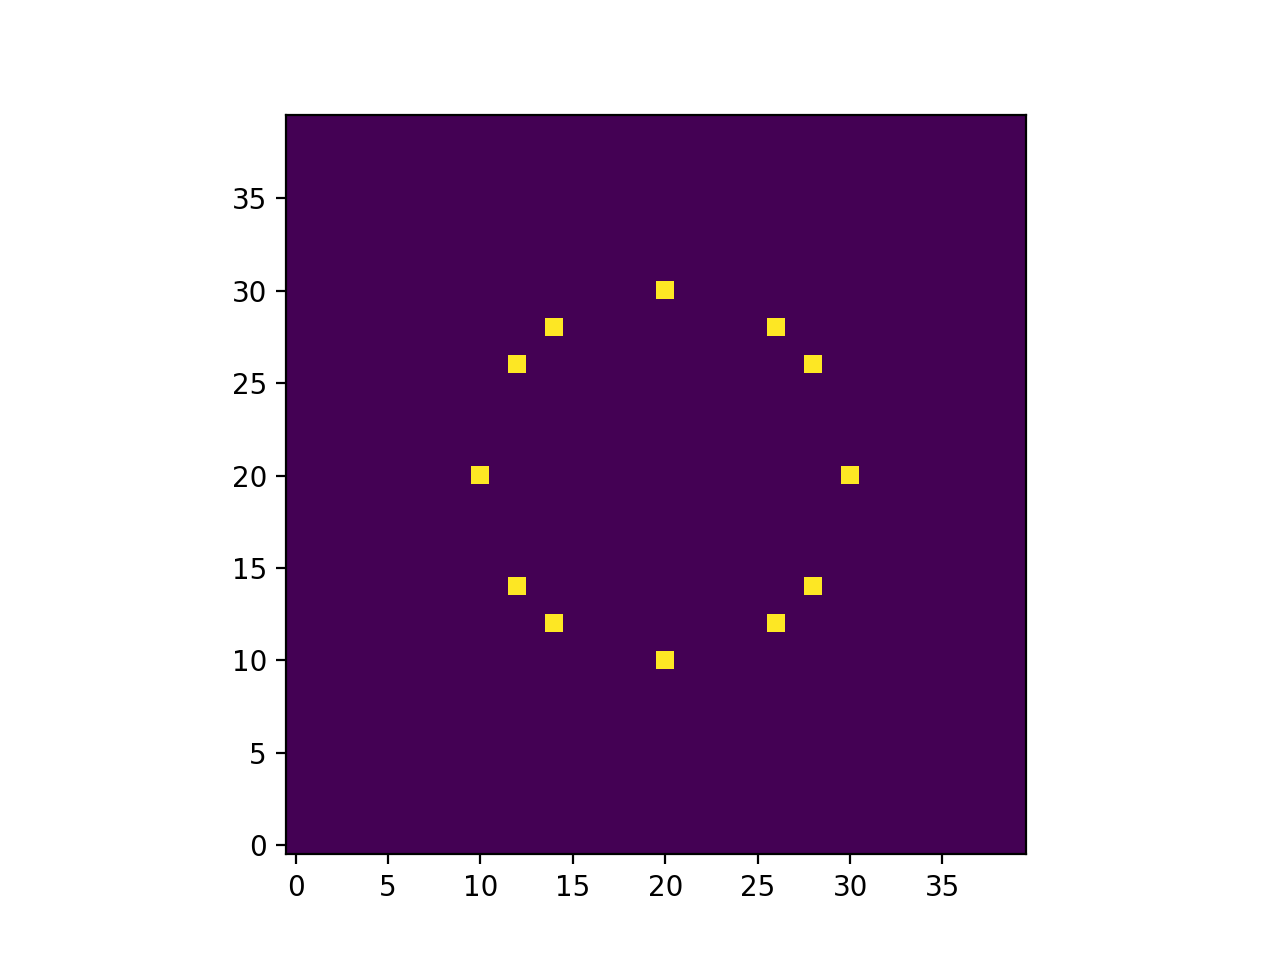

In [3]:
TIG0.setup_potential(vamp=1.5e-18)
figure()
imshow(abs(TIG0.V),origin="lower")

<IPython.core.display.Javascript object>


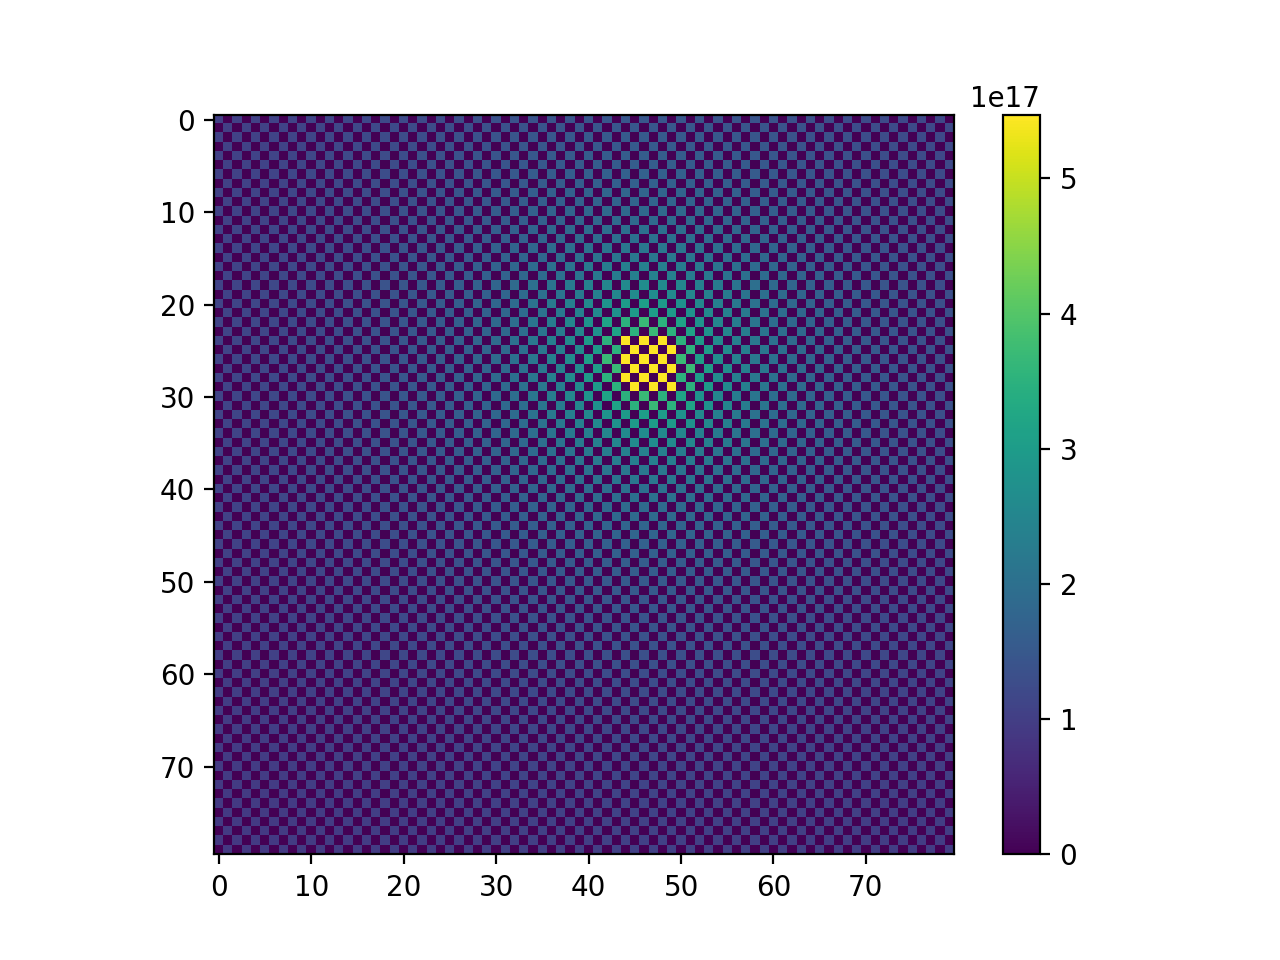

In [4]:
G0=TIG0.return_G0(E=0.2,do_vis=True,x_tip=13,y_tip=23)
figure()
imshow(abs(G0))
colorbar()

<IPython.core.display.Javascript object>


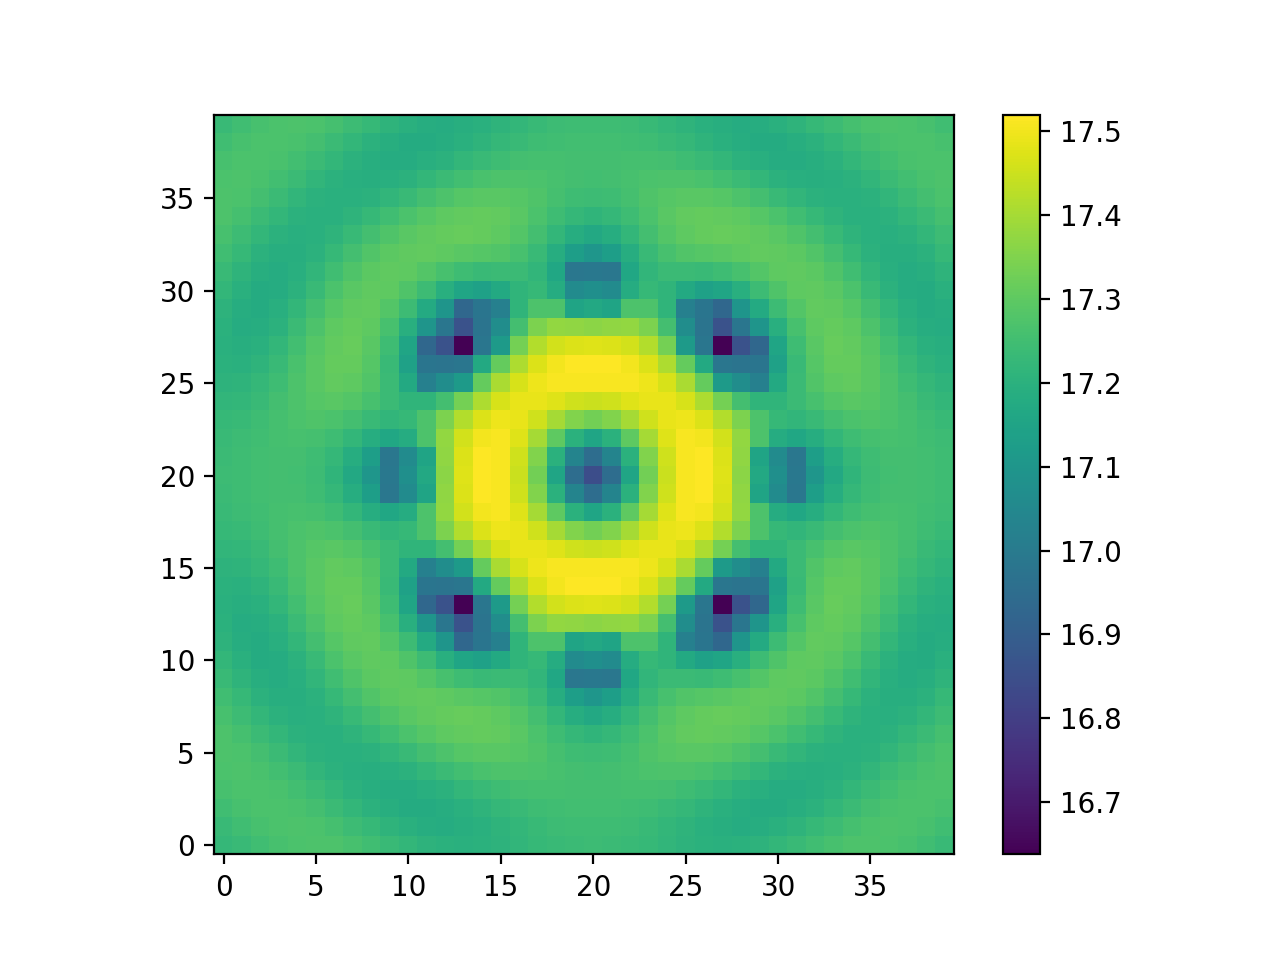

In [6]:
# G0all=TIG0.gen_G0_all(E=0.1)
# figure()
# imshow(log10(abs(G0all)),origin="lower")
# colorbar()

ldos=TIG0.get_ldos(E=0.1)
figure()
imshow(log10(abs(ldos)),origin="lower")
colorbar()

In [15]:
def run_fn(E):
    ldos=TIG0.get_ldos(E=E,loc=[20,20])
    return ldos

def run_ldos_in_parallel(numprocs):
    pool=mp.Pool(processes=numprocs)
    ldos=pool.map(run_fn,E)
    pool.close()
    pool.join()
    return ldos

In [ ]:
# ldos=np.zeros_like(E)
# for i,omega in enumerate(E):
#     ldos[i]=TIG0.get_ldos(E=omega,loc=[20,20])
#     print i,omega,ldos[i]

E=linspace(-0.25,0.25,100)
ldos=run_ldos_in_parallel(6)

<IPython.core.display.Javascript object>


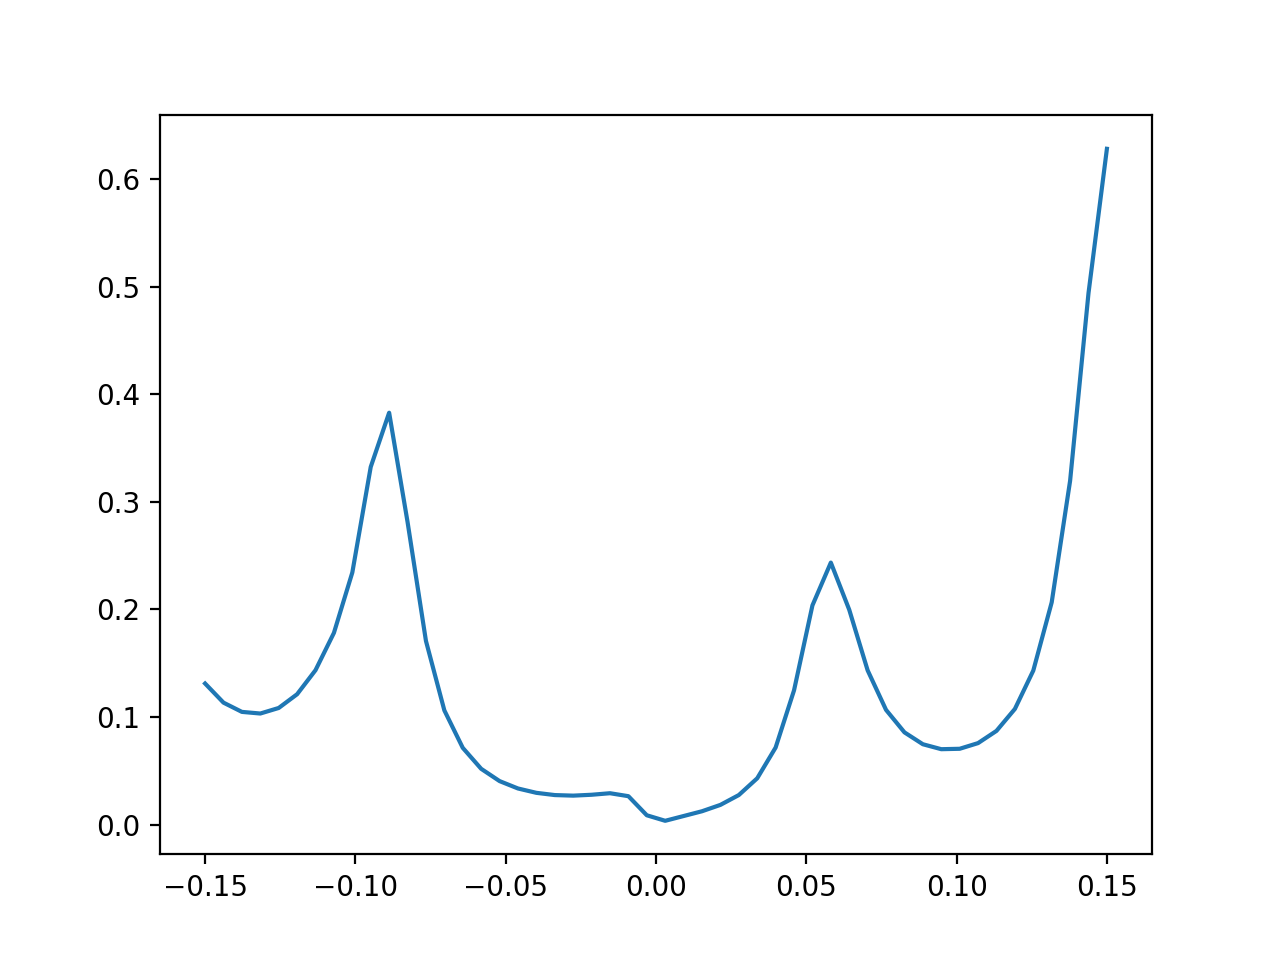

In [20]:
figure()
plot(E,np.array(ldos)/1e18)

In [19]:
ldos

[1.3110116200099859e+17,
 1.1330899572593525e+17,
 1.0471127206712075e+17,
 1.0319311801801379e+17,
 1.0835680278815514e+17,
 1.2113148650725213e+17,
 1.435011095600704e+17,
 1.7815688534746147e+17,
 2.3430768354999878e+17,
 3.3241829211616902e+17,
 3.8283229747098029e+17,
 2.8132274030389968e+17,
 1.7069809791978086e+17,
 1.06135600049938e+17,
 71307079234285560.0,
 51809620162560656.0,
 40379281111989960.0,
 33510772918437124.0,
 29468214792489336.0,
 27385799704376928.0,
 26858953161550916.0,
 27675209089744968.0,
 29102583438173152.0,
 26349859181918080.0,
 8609810238606147.0,
 3466456958170068.5,
 7900964530612790.0,
 12342432618715434.0,
 18264543834619592.0,
 27406551301737300.0,
 42992278108160776.0,
 71593667085331448.0,
 1.2473459404963829e+17,
 2.0370110667891539e+17,
 2.4349591758128512e+17,
 1.9963153892892666e+17,
 1.4331859222364869e+17,
 1.0656073269950963e+17,
 85683294743245904.0,
 74640666024580496.0,
 70030633508641400.0,
 70415326372479496.0,
 75699502610320640.0,
